<a href="https://colab.research.google.com/github/Kalisha1234/Python-Lessons/blob/main/housePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('/content/house_price.csv')

In [3]:
df.head()

,area,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
df.shape

(47, 3)

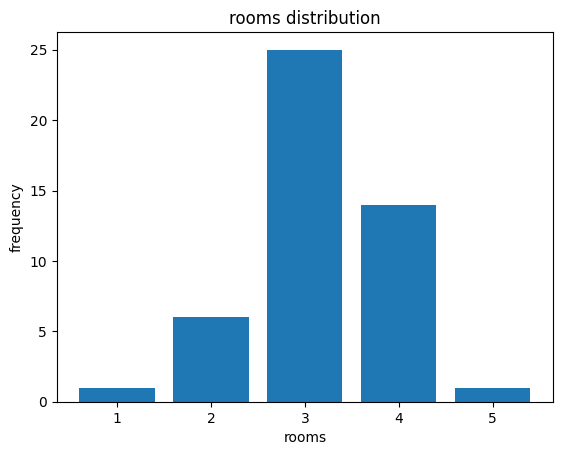

In [5]:
#bar chart
rooms_counts = df['rooms'].value_counts()

plt.bar(rooms_counts.index, rooms_counts.values)

plt.xlabel("rooms")
plt.ylabel("frequency")
plt.title('rooms distribution')

plt.show()

In [6]:
df.dropna(inplace=True)

In [7]:
x = df[['area', 'rooms']]
y = df['price']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

In [9]:
scaler =  StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [10]:
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(x_train_scaled, y_train)

SVR(C=100, gamma=0.1)

In [11]:
y_pred = svr.predict(x_test_scaled)

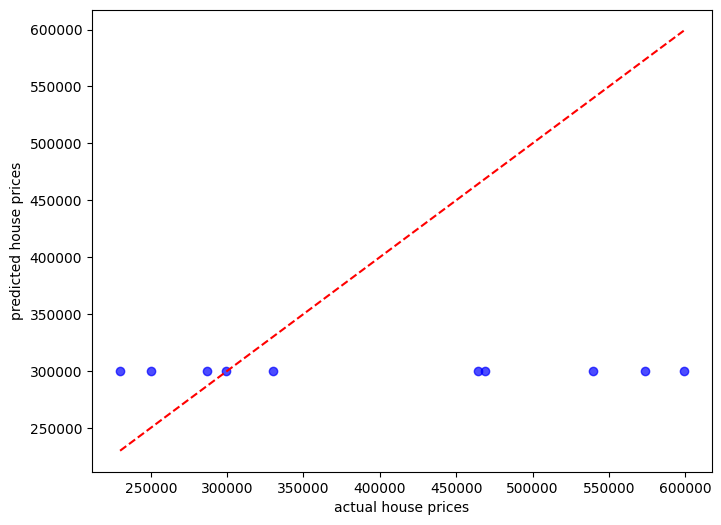

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("actual house prices")
plt.ylabel("predicted house prices")
plt.show()